Assignment 2 : Probability & Random Variables


Q1- compute the joint histogram of time of day & intensity


In [ ]:
from PIL import Image
import numpy as np
import os

def calculate_average_intensity(image_path):
    with Image.open(image_path) as img:
        gray_image = img.convert('L')
        np_image = np.array(gray_image)
        average_intensity = np.mean(np_image)
    return average_intensity


In [ ]:
import os
from PIL import Image
import numpy as np

def calculate_average_intensity(image_path):
    with Image.open(image_path) as img:
        gray_image = img.convert('L')
        np_image = np.array(gray_image)
        average_intensity = np.mean(np_image)
    return average_intensity

def process_images(base_directory):
    time_categories = ['daytime', 'nighttime', 'Evening', 'sunrise']
    results = {time: [] for time in time_categories}

    for time in time_categories:
        time_directory = os.path.join(base_directory, time)
        if os.path.exists(time_directory):
            for filename in os.listdir(time_directory):
                if filename.endswith(('.jpg', '.png', '.jpeg')):
                    file_path = os.path.join(time_directory, filename)
                    intensity = calculate_average_intensity(file_path)
                    results[time].append(intensity)
        else:
            print(f"Directory not found: {time_directory}")

    return results

base_directory = '//content/data'
average_intensities_by_time = process_images(base_directory)

for time, intensities in average_intensities_by_time.items():
    print(f"Time of Day: {time}, Average Intensities: {intensities}")


Time of Day: daytime, Average Intensities: [117.64760044642857, 173.7577527104592, 158.56345663265307, 157.5626992984694, 159.10568797831633, 147.76998963647958, 180.9659797512755, 124.89516900510205, 109.38434709821429, 155.8780293367347, 141.5448620854592, 122.66198979591837, 87.59813456632654, 171.31361607142858, 147.22219786352042, 153.57553411989795, 90.09663982780613, 127.6402662627551, 136.1111288265306, 108.14333545918367, 138.61834343112244, 110.73046875, 179.5207669005102, 203.5642538265306, 117.47480867346938, 164.21095742984693, 107.10509008290816, 155.57075095663265, 179.33077566964286, 112.01690051020408, 148.4714803890306, 120.05269451530613, 131.93767936862244, 160.96835140306123, 93.07914142219387, 115.88305165816327, 160.17129703443877, 163.24944196428572, 154.90736607142858, 150.29751275510205, 152.12416294642858, 201.86198580994898, 193.47367267219389, 205.81821986607142, 99.86019212372449, 158.6096739477041, 105.1938775510204, 145.2028659119898, 178.59074059311226,

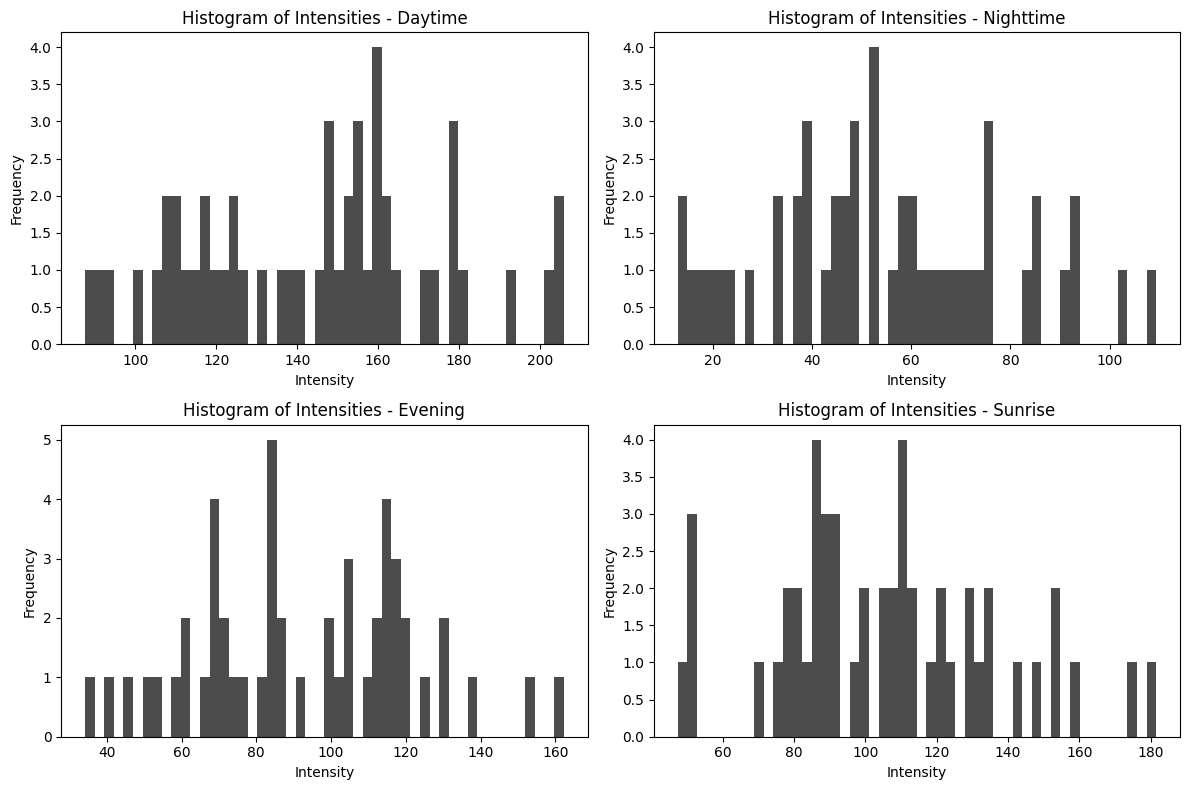

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(results):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()
    for i, (time, intensities) in enumerate(results.items()):
        if intensities:
            axs[i].hist(intensities, bins=50, color='black', alpha=0.7)
            axs[i].set_title(f'Histogram of Intensities - {time.capitalize()}')
            axs[i].set_xlabel('Intensity')
            axs[i].set_ylabel('Frequency')
        else:
            axs[i].text(0.5, 0.5, 'No data available', horizontalalignment='center',
                        verticalalignment='center', transform=axs[i].transAxes)
            axs[i].set_title(f'{time.capitalize()}')
            axs[i].set_xlabel('Intensity')
            axs[i].set_ylabel('Frequency')


    plt.tight_layout()
    plt.show()
plot_histograms(average_intensities_by_time)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


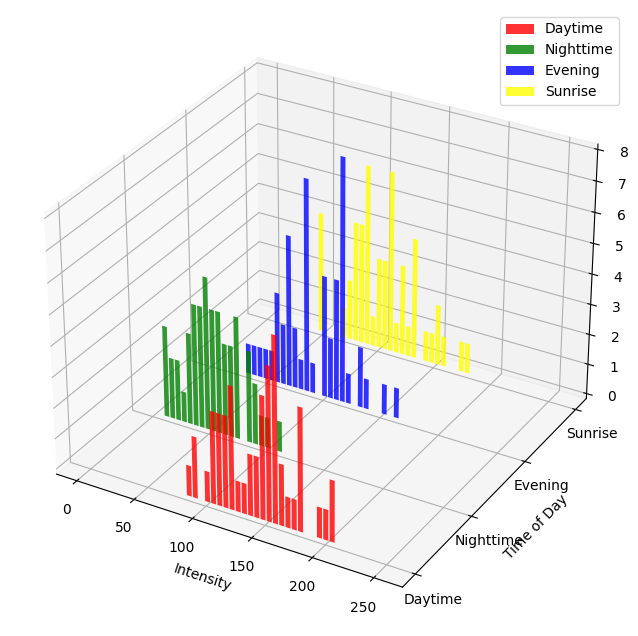

In [ ]:
def plot_3d_histogram(results):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')


    colors = ['red', 'green', 'blue', 'yellow']
    time_categories = list(results.keys())
    bins = np.linspace(0, 255, 50)
    bar_width = (bins[1] - bins[0]) * 0.8
    x_positions = np.arange(len(time_categories))


    for i, time in enumerate(time_categories):
        intensities = results[time]
        if intensities:
            hist, bins = np.histogram(intensities, bins=bins)

            xs = (bins[:-1] + bins[1:]) / 2
            ys = np.full_like(xs, i, shape=xs.shape)
            ax.bar(xs, hist, zs=ys, zdir='y', width=bar_width, color=colors[i], alpha=0.8, label=f'{time.capitalize()}')


    ax.set_xlabel('Intensity')
    ax.set_ylabel('Time of Day')
    ax.set_zlabel('Frequency')
    ax.set_yticks(x_positions)
    ax.set_yticklabels([time.capitalize() for time in time_categories])
    ax.legend()

    plt.show()

plot_3d_histogram(average_intensities_by_time)


Q2-Compute Histogram of(X|I) (I is small window of 4x4)

In [ ]:
import os
from PIL import Image
import numpy as np


sunrise_path = '//content/data/sunrise'
daytime_path = '//content/data/daytime'
nighttime_path = '//content/data/nighttime'
evening_path = '//content/data/Evening'


sunrise_images = []
daytime_images = []
evening_images = []
nighttime_images = []

def load_images_from_directory(directory_path):
    images = []
    for filename in os.listdir(directory_path):

        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            with Image.open(file_path) as image:
                image_array = np.array(image)
                images.append(image_array)
    return images

sunrise_images = load_images_from_directory(sunrise_path)
daytime_images = load_images_from_directory(daytime_path)
nighttime_images = load_images_from_directory(nighttime_path)
evening_images = load_images_from_directory(evening_path)


In [ ]:
sunrise_images

[array([[[171, 159, 133],
         [171, 159, 133],
         [171, 159, 133],
         ...,
         [192, 169, 137],
         [190, 169, 138],
         [190, 169, 138]],
 
        [[171, 159, 133],
         [171, 159, 133],
         [171, 159, 133],
         ...,
         [193, 170, 138],
         [190, 169, 138],
         [190, 169, 138]],
 
        [[173, 159, 133],
         [173, 159, 133],
         [173, 159, 133],
         ...,
         [193, 170, 138],
         [193, 170, 138],
         [192, 169, 137]],
 
        ...,
 
        [[ 38,  34,  22],
         [ 42,  38,  26],
         [ 53,  49,  37],
         ...,
         [ 33,  24,   7],
         [ 37,  28,  11],
         [ 34,  27,   9]],
 
        [[ 86,  84,  72],
         [ 84,  82,  70],
         [ 63,  61,  49],
         ...,
         [ 58,  51,  35],
         [ 79,  72,  56],
         [ 84,  78,  62]],
 
        [[ 24,  22,  10],
         [ 40,  38,  26],
         [ 53,  51,  39],
         ...,
         [ 20,  13,   0],
  

In [36]:
daytime_images

[array([[[  1,  54,  72],
         [  1,  54,  72],
         [  1,  54,  72],
         ...,
         [  0,  75,  98],
         [  0,  75,  98],
         [  0,  75,  98]],
 
        [[  1,  54,  72],
         [  1,  54,  72],
         [  1,  54,  72],
         ...,
         [  0,  75,  98],
         [  0,  75,  98],
         [  0,  75,  98]],
 
        [[  0,  54,  74],
         [  0,  54,  74],
         [  0,  54,  74],
         ...,
         [  0,  76, 100],
         [  0,  76, 100],
         [  0,  76, 100]],
 
        ...,
 
        [[101,  94,  52],
         [ 96,  89,  45],
         [ 99,  92,  50],
         ...,
         [102,  93,  88],
         [ 99,  90,  85],
         [107,  98,  93]],
 
        [[ 80,  71,  28],
         [ 74,  66,  20],
         [ 88,  79,  36],
         ...,
         [101,  90,  84],
         [ 93,  82,  76],
         [ 98,  87,  81]],
 
        [[ 73,  65,  19],
         [ 62,  54,   8],
         [ 78,  70,  24],
         ...,
         [105,  94,  88],
  

In [37]:
nighttime_images

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [29, 16,  7],
         [28, 15,  6],
         [28, 15,  6]

In [38]:
evening_images

[array([[[113, 145, 183],
         [113, 145, 183],
         [114, 146, 184],
         ...,
         [128, 156, 195],
         [128, 156, 195],
         [128, 156, 195]],
 
        [[114, 146, 184],
         [114, 146, 184],
         [114, 146, 184],
         ...,
         [128, 156, 195],
         [128, 156, 195],
         [128, 156, 195]],
 
        [[114, 146, 184],
         [114, 146, 184],
         [115, 147, 185],
         ...,
         [128, 156, 195],
         [128, 156, 195],
         [128, 156, 195]],
 
        ...,
 
        [[215,  83,   0],
         [231, 101,   5],
         [253, 127,  16],
         ...,
         [236, 112,   0],
         [236, 112,   0],
         [235, 111,   0]],
 
        [[231,  99,  17],
         [228,  98,   4],
         [237, 108,   4],
         ...,
         [235, 107,   0],
         [234, 106,   0],
         [234, 106,   0]],
 
        [[207,  76,   0],
         [212,  83,   0],
         [237, 110,   7],
         ...,
         [235, 103,   3],
  

In [40]:
import os
from PIL import Image
import numpy as np

def intensities_all_images(image_path, point_coordinates):
    img = Image.open(image_path).convert('RGB')
    np_img = np.array(img)

    intensities = []
    for x, y in point_coordinates:
        intensities.append(np.mean(np_img[y, x]))

    return intensities

data_dir = '//content/data'
point_coordinates = [(10, 10), (20, 20)]
intensity_arrays = []
for sub_dir in ['daytime', 'nighttime', 'sunrise', 'Evening']:
    sub_dir_path = os.path.join(data_dir, sub_dir)
    if os.path.exists(sub_dir_path):
        for filename in os.listdir(sub_dir_path):
            if filename.endswith('.jpeg') or filename.endswith('.png'):
                image_path = os.path.join(sub_dir_path, filename)
                intensities = intensities_all_images(image_path, point_coordinates)
                intensity_arrays.append(intensities)
    else:
        print(f"Directory does not exist: {sub_dir_path}")
intensity_arrays = np.array(intensity_arrays)
print(intensity_arrays)


[[ 48.          53.        ]
 [183.66666667 120.66666667]
 [186.33333333 189.33333333]
 [178.         180.66666667]
 [194.66666667 181.66666667]
 [ 46.33333333  51.66666667]
 [228.         228.        ]
 [208.         189.33333333]
 [105.66666667 115.33333333]
 [184.33333333 192.        ]
 [216.33333333 193.66666667]
 [ 38.33333333  14.66666667]
 [ 66.33333333  50.33333333]
 [167.66666667 175.66666667]
 [206.66666667 208.        ]
 [169.66666667 141.33333333]
 [ 16.          18.        ]
 [157.33333333 156.33333333]
 [196.33333333 196.33333333]
 [196.33333333 171.66666667]
 [194.         182.        ]
 [170.66666667 177.66666667]
 [188.33333333 193.        ]
 [230.         230.        ]
 [126.33333333 134.33333333]
 [181.         179.33333333]
 [103.         112.66666667]
 [199.33333333 201.66666667]
 [204.66666667 138.66666667]
 [144.33333333 149.33333333]
 [250.33333333 246.        ]
 [128.33333333 138.        ]
 [109.         108.        ]
 [153.         126.33333333]
 [ 89.66666667